In [2]:
from mxnet import gluon
from mxnet import ndarray as nd

def transform(data, label):
    return data.astype('float32')/255, label.astype('float32')
mnist_train = gluon.data.vision.FashionMNIST(train=True, transform=transform)
mnist_test = gluon.data.vision.FashionMNIST(train=False, transform=transform)

In [2]:
data, label = mnist_train[0]
('example shape: ', data.shape, 'label:', label)

('example shape: ', (28L, 28L, 1L), 'label:', 2.0)

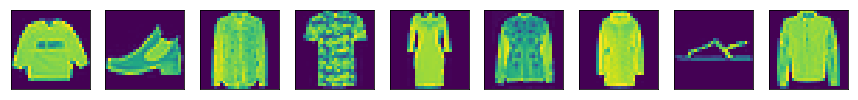

['pullover', 'ankle boot', 'shirt', 't-shirt', 'dress,', 'coat', 'coat', 'sandal', 'coat']


In [3]:
import matplotlib.pyplot as plt

def show_images(images):
    n = images.shape[0]
    _, figs = plt.subplots(1, n, figsize=(15, 15))
    for i in range(n):
        figs[i].imshow(images[i].reshape((28, 28)).asnumpy())
        figs[i].axes.get_xaxis().set_visible(False)
        figs[i].axes.get_yaxis().set_visible(False)
    plt.show()

def get_text_labels(label):
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress,', 'coat',
        'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
    ]
    return [text_labels[int(i)] for i in label]

data, label = mnist_train[0:9]
show_images(data)
print(get_text_labels(label))

In [5]:
batch_size = 256
train_data = gluon.data.DataLoader(mnist_train, batch_size, shuffle=True)
test_data = gluon.data.DataLoader(mnist_test, batch_size, shuffle=False)

In [47]:
num_inputs = 784
num_outputs = 10

W = nd.random_normal(shape=(num_inputs, num_outputs))
b = nd.random_normal(shape=num_outputs)

params = [W, b]

In [36]:
for param in params:
    param.attach_grad()

In [37]:
def softmax(y):
    exp_ele = nd.exp(y)
    partition = exp_ele.sum(axis=1, keepdims=True)
    return exp_ele / partition

def net(x):
    return softmax(nd.dot(x.reshape((-1, num_inputs)), W) + b)
t = nd.array([1, 2, 3, 4])
# print t.exp()
# la = nd.reshape(t, shape=(4, 1))
# print la
# print t.reshape(shape=(4, 1))
# print la.sum(axis=1, keepdims=True)
# print nd.exp(la)
# print nd.sum(nd.exp(la))
# print nd.exp(la).sum(axis=1, keepdims=True)

In [38]:
def SGD(params, lr):
    for param in params:
        param[:] -= lr * param.grad

In [39]:
def cross_entry(y_hy, y_true):
    return - nd.pick(nd.log(y_hy), y_true)

In [8]:
def accuracy(y_hy, y_true):
    return nd.mean(y_hy.argmax(axis=1)==y_true).asscalar()

def test_accuracy(data_iterator, net):
    acc = 0
    for data, label in data_iterator:
        output = net(data)
        acc += accuracy(output, label)
    return acc / len(data_iterator)


[[  1.   2.   3.]
 [  4.   9.   6.]
 [ 11.   8.   9.]]
<NDArray 3x3 @cpu(0)>

[ 2.  1.  2.]
<NDArray 3 @cpu(0)>


In [46]:
from mxnet import autograd as ag

learning_rate = 0.001
epoch_num = 10
for epoch in xrange(epoch_num):
    total_loss = 0
    for data, label in train_data:
        with ag.record():
            y_hy = net(data)
            loss = cross_entry(y_hy, label)
        loss.backward()
        SGD(params, learning_rate/batch_size)
    total_loss += nd.mean(loss).asscalar()
    print "epoch:", epoch, " total_loss:", total_loss

epoch: 0  total_loss: nan
epoch: 1  total_loss: nan
epoch: 2  total_loss: nan
epoch: 3  total_loss: nan
epoch: 4  total_loss: nan
epoch: 5  total_loss: nan
epoch: 6  total_loss: nan
epoch: 7  total_loss: nan
epoch: 8  total_loss: nan
epoch: 9  total_loss: nan


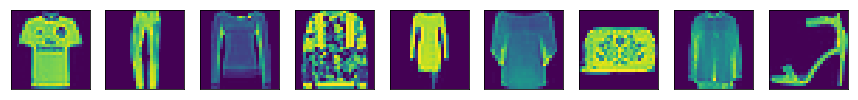

true labels
['t-shirt', 'trouser', 'pullover', 'pullover', 'dress,', 'pullover', 'bag', 'shirt', 'sandal']
predicted labels
['trouser', 'sneaker', 'pullover', 'pullover', 'sneaker', 'trouser', 'pullover', 'pullover', 'sneaker']


In [48]:
data, label = mnist_test[0:9]
show_images(data)
print('true labels')
print(get_text_labels(label))

predicted_labels = net(data).argmax(axis=1)
print('predicted labels')
print(get_text_labels(predicted_labels.asnumpy()))